# EDA

- Load in your csv.gz's of results for each year extracted.
- Concatenate the data into 1 dataframe for the remainder of the analysis.


- Once you have your data from the API, they would like you to perform some light EDA to show:
    - How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
        - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
    - How many movies are there in each of the certification categories (G/PG/PG-13/R)?
    - What is the average revenue per certification category?
    - What is the average budget per certification category

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')

In [2]:
FOLDER = "Data/"
os.listdir(FOLDER)

['final_tmdb_data_2006.csv.gz',
 'tmdb_api_results_2010.json',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'tmdb_api_results_2006.json',
 'final_tmdb_data_2022.csv.gz',
 'title_basics_cleaned.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'tmdb_api_results_2007.json',
 'final_tmdb_data_2020.csv.gz',
 'tmdb_api_results_2011.json',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2020.json',
 'tmdb_api_results_2016.json',
 'tmdb_api_results_2000.json',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'tmdb_api_results_2001.json',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'tmdb_api_results_2017.json',
 'tmdb_api_results_2021.json',
 'tmdb_api_results_2022.json',
 'tmdb_api_results_2018.json',
 'final_tmdb_data_2023.csv.gz',
 'tmdb_api_results_2002.json',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'tmdb_api_results_2014.json',
 'final_tmdb_data_201

In [3]:
## Should show students glob
import glob
q  = f"{FOLDER}final*.csv.gz"
files = sorted(glob.glob(q))
files

['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz',
 'Data/final_tmdb_data_2020.csv.gz',
 'Data/final_tmdb_data_2021.csv.gz',
 'Data/final_tmdb_data_2022.csv.gz',
 'Data/final_tmdb_data_2023.csv.gz']

### Concatenating DataFrames

In [4]:
#### Low-Lift Version/Basic Version
# df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')

# df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
# df_2002 = pd.read_csv('Data/final_tmdb_data_2002.csv.gz')

In [5]:
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in files] )
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.000,0.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.500,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5718,tt9898844,0.0,/5CyeeUJ7OG55fknaeNA7UPLhUDA.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,5.569,65.0,NaN
5719,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,5.250,3.0,NaN
5720,tt9907782,0.0,/hPurpFeAkvkvWYRVSDYGDaDSgva.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",NaN,630392.0,en,The Cursed,...,4588389.0,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Innocence will fall prey.,The Cursed,0.0,6.740,233.0,NaN
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98494 entries, 0 to 0
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                98494 non-null  object 
 1   adult                  98470 non-null  float64
 2   backdrop_path          58098 non-null  object 
 3   belongs_to_collection  5951 non-null   object 
 4   budget                 98470 non-null  float64
 5   genres                 98470 non-null  object 
 6   homepage               18976 non-null  object 
 7   id                     98470 non-null  float64
 8   original_language      98470 non-null  object 
 9   original_title         98470 non-null  object 
 10  overview               92913 non-null  object 
 11  popularity             98470 non-null  float64
 12  poster_path            89808 non-null  object 
 13  production_companies   98470 non-null  object 
 14  production_countries   98470 non-null  object 
 15  releas

In [7]:
# filter based on year released

df['release_date_format'] = pd.to_datetime(df['release_date'])

In [8]:
df['year'] = df['release_date_format'].dt.year

In [9]:
#df['year'].value_counts()

In [10]:
# Lets just take years from 2000-2023
plot_year = df['year'] >=2000

In [11]:
plot_year.value_counts()

True     96488
False     2006
Name: year, dtype: int64

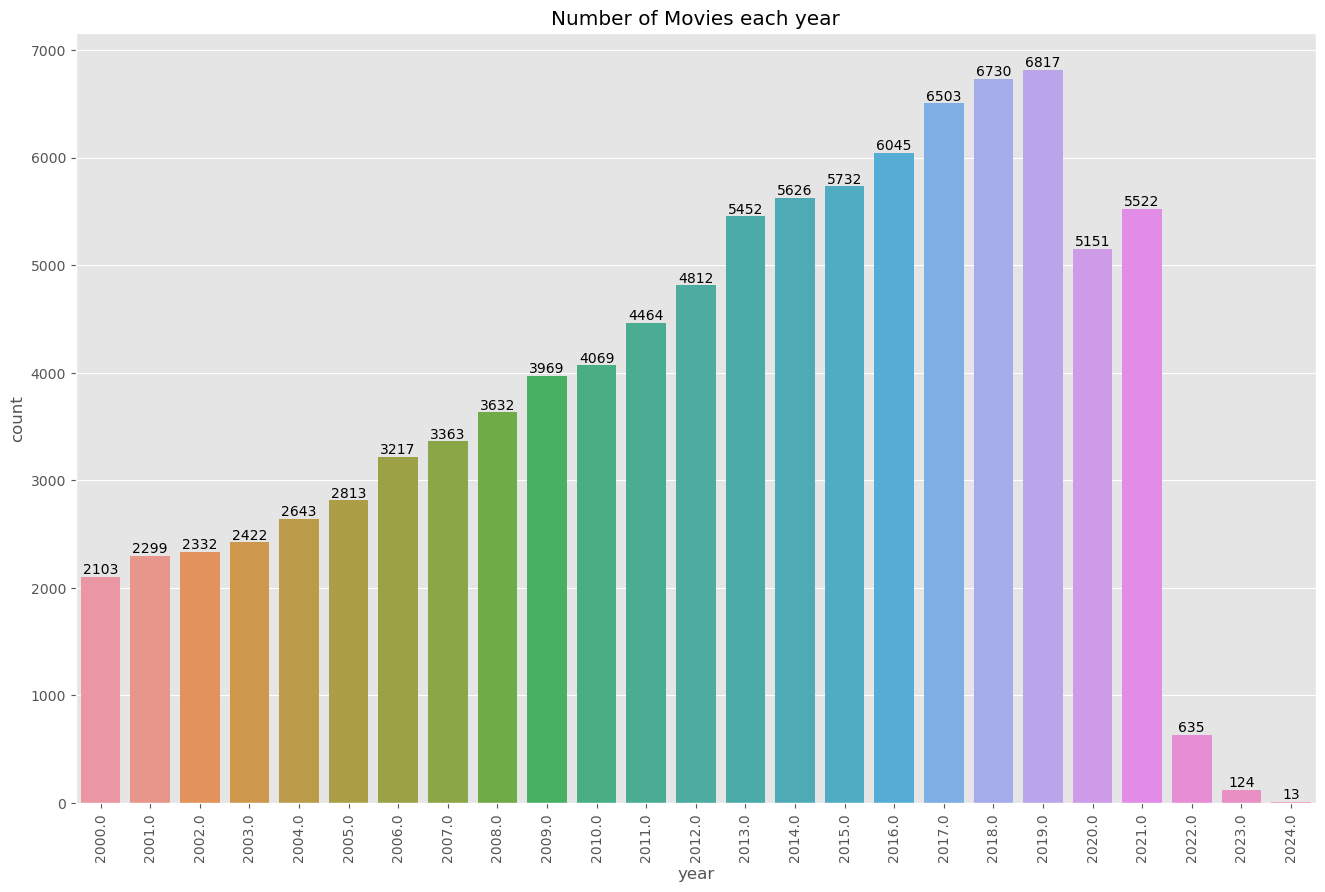

In [12]:
plot_year_df = df[plot_year]
plt.figure(figsize=(16, 10))

ax = sns.countplot(data=plot_year_df, x='year');

# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.set_title('Number of Movies each year')
ax.bar_label(ax.containers[0]);

# Display count values at the top of each bar
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [13]:
filter_financial = (df['budget'] > 0) | (df['revenue']>0)
filter_financial.value_counts()

False    80395
True     18099
dtype: int64

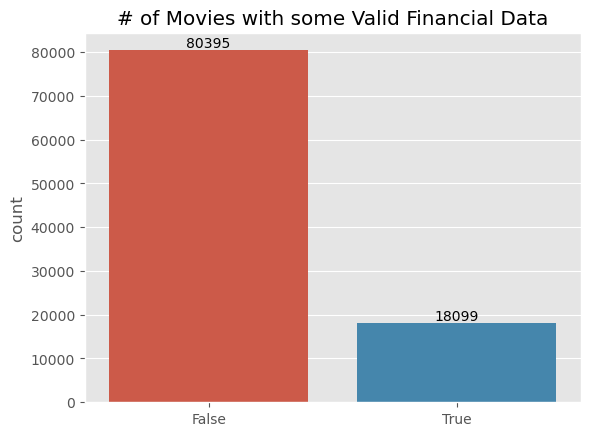

In [14]:
ax = sns.countplot(x=filter_financial)
ax.set_title('# of Movies with some Valid Financial Data')
ax.bar_label(ax.containers[0]);

# source : https://stackoverflow.com/questions/68320207/how-to-get-the-label-values-on-a-bar-chat-with-seaborn-on-a-categorical-data
# # method to show % on the bar label
# ax = sns.barplot(x='coast', y='coast', estimator=lambda x: len(x) / len(data) * 100, data=data)
# ax.bar_label(ax.containers[0], fmt='%.f%%')
# ax.set_ylabel('%')

### Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [15]:
plot_df = df[filter_financial].copy()


## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [16]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NR']#,'NC-17']

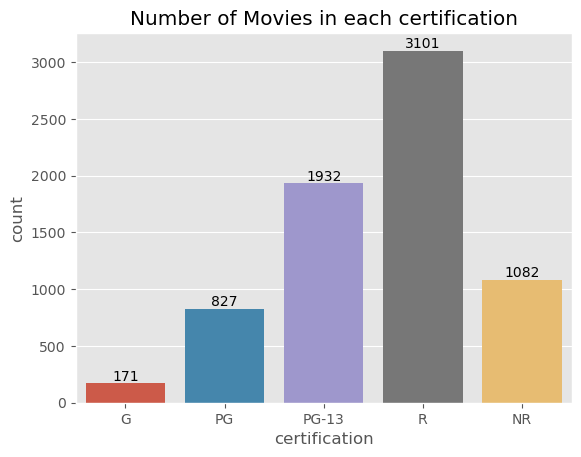

In [17]:
ax = sns.countplot(data=plot_df, x='certification',order=cert_order);
ax.set_title('Number of Movies in each certification')
ax.bar_label(ax.containers[0]);

## What is the average revenue per certification category?

In [18]:
# groupby cert and rev
rev_avg = plot_df.groupby('certification')['revenue'].agg(mean_revenue = ("mean"))

#set new aggregate mean onto rev_avg
rev_avg = rev_avg.reset_index()
rev_avg = rev_avg.round()
rev_avg.head()

,certification,mean_revenue
0,G,82784466.0
1,NC-17,4263442.0
2,NR,5778120.0
3,PG,118684514.0
4,PG-13,109025167.0


In [19]:
# def function for millions ($)
def hundred_m(x,pos):
    """function for use with matplotlib FuncFormatter -  formats revenue in millions"""
    return f"${x/1000000:,.0f}M"

# function test
hundred_m(120000000,0)

'$120M'

In [20]:
# creating a formatter for improved viz
price_fmt_100m = FuncFormatter(hundred_m)

Text(0.5, 1.0, 'Revenue Average by Certification Category')

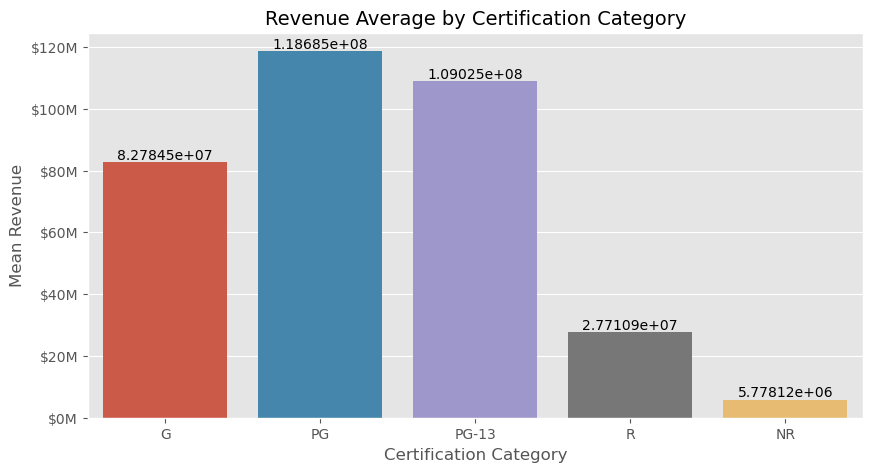

In [26]:
# set the style
#plt.style.use('seaborn-white')
# plt.style.use('ggplot')

# set the size
fig, ax = plt.subplots(figsize=(10,5))
ax.yaxis.set_major_formatter(price_fmt_100m)


# plot bars
sns.barplot(x='certification', 
                y='mean_revenue', 
                order=['G','PG','PG-13','R','NR'],
                data = rev_avg) 
ax.bar_label(ax.containers[0]);
# labels and title
plt.ylabel("Mean Revenue", size=12)
plt.xlabel("Certification Category", size=12)
plt.title("Revenue Average by Certification Category", size=14)

In [22]:
# OR : sns.barplot(data=plot_df, x='certification',y='revenue', order=cert_order);

## What is the average budget per certification category?

In [23]:
# grouping certs by budget mean
budget_avg = plot_df.groupby('certification')['budget'].agg(mean_budget = ("mean"))
budget_avg

#set new aggregate mean onto rev_avg
budget_avg = budget_avg.reset_index()
budget_avg = budget_avg.round(0)
budget_avg.head()

,certification,mean_budget
0,G,28791599.0
1,NC-17,2173832.0
2,NR,2525815.0
3,PG,39217618.0
4,PG-13,38025525.0


Text(0.5, 1.0, 'Budget Average by Certification Category')

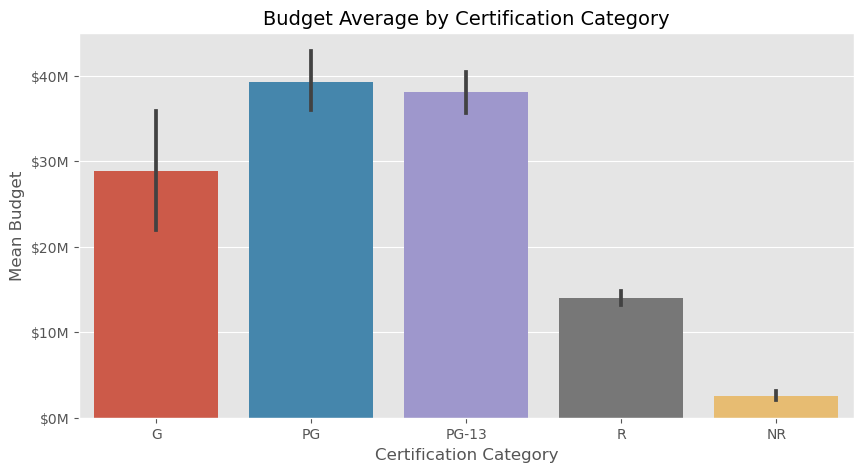

In [24]:
# set the size
fig, ax = plt.subplots(figsize=(10,5))
ax.yaxis.set_major_formatter(price_fmt_100m)

# plot bars
sns.barplot(data=plot_df, x='certification',y='budget', order=cert_order);
# labels and title
plt.ylabel("Mean Budget", size=12)
plt.xlabel("Certification Category", size=12)
plt.title("Budget Average by Certification Category", size=14)
